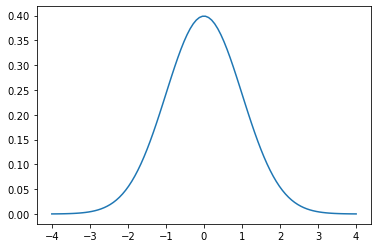

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
mu = 0
std = 1
x = np.linspace(start=-4, stop=4, num=100)
y = stats.norm.pdf(x, mu, std) 
plt.plot(x, y)
plt.show()

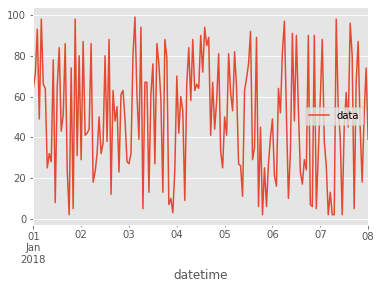

In [49]:
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)

df.plot()

In [50]:
df

,data
datetime,
2018-01-01 00:00:00,64
2018-01-01 01:00:00,71
2018-01-01 02:00:00,93
2018-01-01 03:00:00,49
2018-01-01 04:00:00,98
...,...
2018-01-07 20:00:00,45
2018-01-07 21:00:00,18
2018-01-07 22:00:00,51
